Hi there! This is Shavarsh Melikyan's gradient descent algorithm's implementation. 
This algorithm was learnt through the ML specialization's "Supervized Machine Learning" (part 1: https://www.deeplearning.ai/program/machine-learning-specialization/) course; materials from week #1

In [3]:
#first of all, importing important and useful libraries
import numpy as np
import math, copy
import matplotlib.pyplot as plt

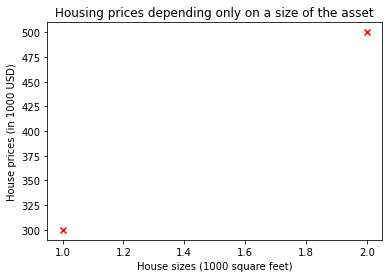

In [2]:
#some arbitrary data of houses' sizes and their prices and the plot

x_train = np.array([1.0, 2.0])
y_train = ([300.0, 500.0])

plt.scatter(x_train, y_train, marker = 'x', color = 'r')
plt.xlabel('House sizes (1000 square feet)')
plt.ylabel('House prices (in 1000 USD)')
plt.title('Housing prices depending only on a size of the asset')
plt.show()

In [5]:
#function which defines a cost function (which we have to minimize by GD)

def compute_cost(x, y, w, b):
    m = x.shape[0] #number of examples
    cost = 0
    
    for i in range(m): #sum of differences' square
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
        
    total_cost = cost / (2*m) 
    return total_cost

In [6]:
#now writing the function for computing gradients (partial derivatives with respect to w and b of cost function J)

def compute_gradient(x, y, w, b):
    m = x.shape[0] #number of examples
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
        
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [12]:
#defining function of the gradient descent which returns w, b and lists of cost function's values 
#and parameter lists ([w, b])

"""

"""

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    
    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)
    dj_dw = 0
    dj_db = 0
    J_history = []
    p_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 10000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b, J_history, p_history

In [13]:
#implementing the above written function:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 0.01

w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


In [14]:
#examples of predictions

print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


[]

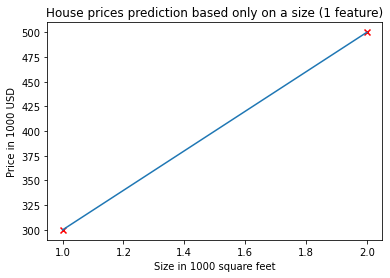

In [15]:
#plotting the graph

plt.plot(x_train, x_train * w_final + b_final)
plt.scatter(x_train, y_train, marker = 'x', c = 'r')
plt.xlabel("Size in 1000 square feet")
plt.ylabel("Price in 1000 USD")
plt.title("House prices prediction based only on a size (1 feature)")
plt.plot()